#Dependencies

We use open meteo to fetch air quality data and pandas to show a chart

In [18]:
location = (46.3044, 16.3378) #Varazdin, Croatia
aqi_treshold = 60 #Poor


In [19]:
#Dependencies
%pip install openmeteo-requests
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:

#block for downloading from Open Meteo
import numpy
import openmeteo_requests
from datetime import datetime

url = "https://air-quality-api.open-meteo.com/v1/air-quality"
date_string = datetime.now().strftime('%Y-%m-%d')
params = {
	"latitude": location[0],
	"longitude": location[1],
	"hourly": ["european_aqi"],
    "start_date": date_string,
	"end_date": date_string,
}
openmeteo = openmeteo_requests.Client()
response = openmeteo.weather_api(url, params=params)[0] #API returns a list of responses, we only want the first one
values = response.Hourly().Variables(0).ValuesAsNumpy()
filename = 'varazdin.csv'
numpy.savetxt(filename, values)

In [21]:
good_aqi_day = False
with open(filename) as file:
    for line in file:
        aqi = float(line)
        if aqi < aqi_treshold:
            good_aqi_day = True
            break
if good_aqi_day:
    print('Good day to go out!')
else:
    print('Good day to stay inside')

Good day to go out!


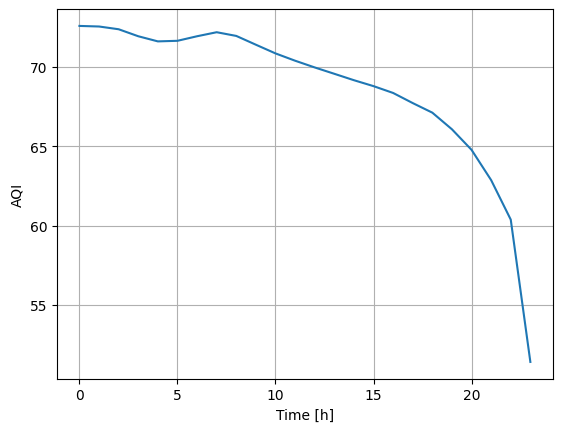

In [24]:
from matplotlib import pyplot

with open(filename) as file:
    aqi_strings = file.readlines()
    aqi_floats = [float(x) for x in aqi_strings]
    aqi_array = numpy.array(aqi_floats)
    
    pyplot.plot(aqi_array)
    pyplot.xlabel("Time [h]")
    pyplot.ylabel("AQI")
    pyplot.grid()
    pyplot.show()
        

In [ ]:
#Method